# Twitter US Airline Sentiment

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/FastAI/Twitter%20US%20Airline%20Sentiment.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/FastAI/Twitter%20US%20Airline%20Sentiment.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

In [1]:
from fastai.text import *

## Dataset

In [2]:
path = Path('/media/gilbert/948A92E98A92C760/Local_Programming/Datasets/Other/Twitter US Airline Sentiment Dataset')
path.ls()

[PosixPath('/media/gilbert/948A92E98A92C760/Local_Programming/Datasets/Other/Twitter US Airline Sentiment Dataset/Link.txt'),
 PosixPath('/media/gilbert/948A92E98A92C760/Local_Programming/Datasets/Other/Twitter US Airline Sentiment Dataset/models'),
 PosixPath('/media/gilbert/948A92E98A92C760/Local_Programming/Datasets/Other/Twitter US Airline Sentiment Dataset/Tweets.csv')]

In [3]:
df = pd.read_csv(path/'Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
train_df, valid_df = df.loc[:12000,:], df.loc[12000:,:]
len(train_df), len(valid_df)

(12001, 2640)

In [5]:
data_lm = TextLMDataBunch.from_df(Path(path), train_df, valid_df, text_cols=10, bs=32)
data_clas = TextClasDataBunch.from_df(Path(path), train_df, valid_df, text_cols=10, label_cols=1, bs=32)

In [6]:
data_lm.show_batch()

idx,text
0,"about it xxbos @virginamerica seriously would pay $ 30 a flight for seats that did n't have this playing . \n it 's really the only bad thing about flying xxup va xxbos @virginamerica yes , nearly every time i fly xxup vx this “ xxunk xxunk ” wo n’t go away :) xxbos @virginamerica xxmaj really missed a xxunk opportunity for xxmaj xxunk xxmaj without xxmaj xxunk xxunk ,"
1,"you guys were starting those flights at the end of the month ! xxmaj guess i ’m still road xxunk on xxmaj feb 27 … xxbos @virginamerica thanks for that . xxmaj been needing a way to make those xxmaj austin trips from xxup dca , and now you 've come through ! xxbos @virginamerica announced xxmaj new xxmaj route to xxmaj austin w / fares from $ 39 /"
2,xxmaj delhi call xxunk . xxmaj poor xxmaj united staff spread thin and stressed . xxmaj you name it . xxbos @united xxmaj yes . xxmaj does n't make that mistake any less absurd . xxmaj does n't change the fact that i 'm very xxunk missing my luggage tonight . xxbos @united i 'm constantly having xxunk with upgrades & & charges . xxmaj in order to prevent xxup
3,"xxbos @united , and now while waiting for new pilot the door on plane xxup broke . why am i global services status on an airline that 's xxunk ? xxup xxunk xxbos @united xxmaj how do i get reimbursed for hotel and taxis for the xxmaj cancelled xxmaj flightation ? xxbos @united xxmaj awesome flight crew on xxup xxunk , re the plane , the xxmaj xxunk period called"
4,is 2:30 hrs delayed so far b / c of xxmaj late xxmaj flight crew . xxmaj now we are literally waiting while they have dinner xxunk . to honest gate agent . xxbos @united many people on xxmaj xxunk are going to miss connections due to long wait time in xxup sfo tarmac . xxmaj seriously u ca n't find an empty gate ? xxbos @united xxmaj you 're


In [7]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @virginamerica xxmaj many xxmaj thanks for the xxmaj follow . \n # xxunk # xxunk # xxup usa # xxmaj xxunk \n xxmaj looking for xxmaj any xxmaj help 😍 \n 💗 🇬 🇧 💗 🇺 🇸 💗 \n 🎀 xxunk 🎀 http : / / t.co / xxunk,neutral
"xxbos @united xxmaj united xxmaj club team is xxup a+ & & got me a seat xxmaj late xxmaj flightr . xxmaj still , not sure why a last min xxup ual xxmaj cancelled xxmaj flightlation costs me $ yet overbooked folks get $ ?",negative
xxbos @jetblue xxmaj flight 136 departs xxunk xxup am xxmaj finally ! ! ! xxmaj arrived xxup jfk with no xxunk at xxunk xxup pm . xxmaj that 's a long flight . xxup aka xxup bus http : / / t.co / xxunk,negative
xxbos @usairways xxmaj my hubby has a 5hr layover in xxup dfw xxunk the xxunk flt . xxmaj pls help get him home sooner if you can ! xxmaj any room on s / by 2 xxup bwi or xxup phl today ?,neutral


## Language model

In [8]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


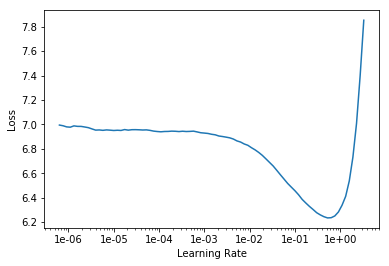

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.608401,4.314568,0.216563


In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


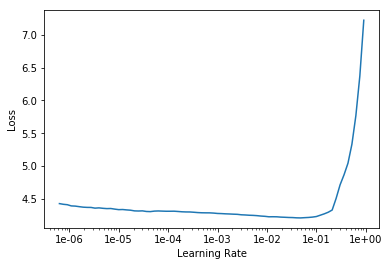

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.164592,4.145639,0.235074
2,3.985004,3.965798,0.258884
3,3.813833,3.862134,0.268512
4,3.683870,3.809419,0.272961
5,3.519063,3.764102,0.279018
6,3.378885,3.740636,0.281429
7,3.258823,3.758763,0.281190
8,3.164661,3.759633,0.280997
9,3.110600,3.772064,0.281116
10,3.072069,3.777004,0.280923


In [14]:
learn.save('twitter-sentiment-lm')

Testing our language model

In [15]:
TEXT = "I liked "
N_WORDS = 40
N_SENTENCES = 2

In [16]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked  was a piece of paper , and it was very difficult to locate if it was correct . xxbos @united , first time flying with you , then u like my next flight .. i always fly with you guys
I liked  the organization for public access . xxup ua xxbos @southwestair xxmaj random promo code , the most annoying words form - words are always used when you write a letter that does nt answer the phone . xxbos @united xxmaj


In [17]:
learn.save_encoder('twitter-sentiment-enc')

## Classifier

In [18]:
learn = text_classifier_learner(data_clas, pretrained_model=URLs.WT103, drop_mult=0.3)
learn.load_encoder('twitter-sentiment-enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


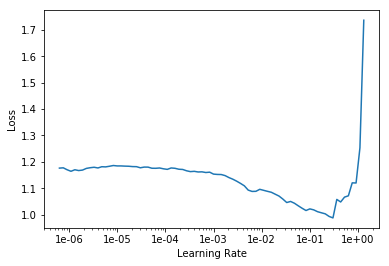

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,0.657963,0.483424,0.806061


In [21]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.601170,0.430959,0.832197


In [22]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.549314,0.427016,0.838636


In [23]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.479139,0.382407,0.853788
2,0.433286,0.377737,0.850758


In [25]:
print(learn)

RNNLearner(data=TextClasDataBunch;

Train: LabelList
y: CategoryList (12001 items)
[Category neutral, Category positive, Category neutral, Category negative, Category negative]...
Path: /media/gilbert/948A92E98A92C760/Local_Programming/Datasets/Other/Twitter US Airline Sentiment Dataset
x: TextList (12001 items)
[Text xxbos @virginamerica xxmaj what xxunk said ., Text xxbos @virginamerica plus you 've added commercials to the experience ... xxunk ., Text xxbos @virginamerica i did n't today ... xxmaj must mean i need to take another trip !, Text xxbos @virginamerica it 's really aggressive to xxunk xxunk " entertainment " in your guests ' faces & & they have little recourse, Text xxbos @virginamerica and it 's a really big bad thing about it]...
Path: /media/gilbert/948A92E98A92C760/Local_Programming/Datasets/Other/Twitter US Airline Sentiment Dataset;

Valid: LabelList
y: CategoryList (2640 items)
[Category negative, Category neutral, Category positive, Category positive, Category neu

In [28]:
learn.predict("I really loved the flight")

(Category positive, tensor(2), tensor([0.1067, 0.0125, 0.8808]))